<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
breast_cancer_csv = '../DATA/breast-cancer-wisconsin-data.csv'

In [4]:
df = pd.read_csv(breast_cancer_csv)

### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

Dataset

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Checking for Null Values

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Dropping Unnamed Columns

In [7]:
df = df.drop(columns = 'Unnamed: 32')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

Make Target Column Binary

In [9]:
df_one = pd.get_dummies(df.diagnosis)
df_one

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [10]:
df = pd.concat((df, df_one), axis = 1)
df = df.drop(['diagnosis'], axis = 1)
df = df.drop(['M'], axis = 1)
df = df.rename(columns = {
    'B':'is_cancer'
})
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,is_cancer
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
X = df.drop(columns = ['id', 'is_cancer'])
y = df['is_cancer']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 42)

In [14]:
log = LogisticRegression(max_iter = 2000)

log.fit(X_train, y_train)

# Train Accuracy Score
log.score(X_train, y_train)

0.9582417582417583

In [16]:
np.mean(cross_val_score(log, X_train, y_train, cv = 5))

C:\Users\darry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9494505494505494

In [17]:
np.mean(cross_val_score(log, X_test, y_test, cv = 5))

0.9391304347826086

### Crossed scored on test data with both numeric & categorical features for logistic regression model

In [17]:
y_pred = log.predict(X_test)

In [18]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.99      0.96      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [19]:
# Test Accuracy Score
log.score(X_test, y_test)

0.9649122807017544

In [20]:
print(confusion_matrix(y_pred, y_test))
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[[39  1]
 [ 3 71]]
[['TN' 'FP']
 ['FN' 'TP']]


#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [22]:
# predict test class:
y_pred = log.predict(X_test)
# predicted test probability:
preds = log.predict_proba(X_test)

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [23]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels = [1,0]).reshape(-1)
print('Outcome values: \n', tp, fn, fp, tn)

Outcome values: 
 71 1 3 39


In [24]:
# ANSWER
cm = confusion_matrix(y_pred, y_test)
cm = pd.DataFrame(cm, index = ['is_cancer', 'is_healthy'], columns = ['predicted_cancer','predicted_healthy'])

In [25]:
print(cm)
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

            predicted_cancer  predicted_healthy
is_cancer                 39                  1
is_healthy                 3                 71
[['TN' 'FP']
 ['FN' 'TP']]


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [26]:
# ANSWER
# use float to perform true division, not integer division
accuracy = (tp + tn) / float(tp + tn + fp + fn)
print('Classification Accuracy: ', accuracy)

Classification Accuracy:  0.9649122807017544


#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [27]:
# ANSWER
misclassification_rate = (fp + fn) / float(tp + tn + fp + fn)
print('Misclassification rate is ' , misclassification_rate)

Misclassification rate is  0.03508771929824561


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [28]:
# ANSWER
tpr = tp/float(fn+tp)
print('tpr is ', tpr)

tpr is  0.9861111111111112


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [29]:
# ANSWER
tnr = tn / float(tn+fp)
('Correct Negative Prediction Rate: ', tnr)

('Correct Negative Prediction Rate: ', 0.9285714285714286)

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [30]:
# ANSWER
fpr = fp/float(tn+fp)
('False Postive Rate: ', fpr)

('False Postive Rate: ', 0.07142857142857142)

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [31]:
# ANSWER
precision = tp/float(tp+fp)
print('Precision: ', precision)

Precision:  0.9594594594594594


#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [32]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)
columns = ['class_0_pp', 'class_1_pp']
prob_df = pd.DataFrame(preds, columns = columns)
prob_df

,class_0_pp,class_1_pp
0,1.000000,3.147714e-11
1,0.000037,9.999632e-01
2,0.948573,5.142715e-02
3,0.393530,6.064701e-01
4,1.000000,1.721041e-09
...,...,...
109,0.999999,6.632066e-07
110,0.056501,9.434992e-01
111,0.989302,1.069825e-02
112,0.089076,9.109243e-01


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [33]:
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

<Figure size 576x576 with 0 Axes>

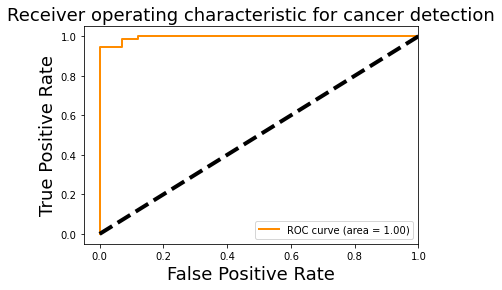

In [43]:
# For class 1, find the area under the curve
preds = log.predict_proba(X_test)[:,1]
# Find fpr, tpr
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# Find auc
roc_auc = metrics.auc(fpr, tpr)
# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.figure()
lw = 2
label = 'ROC curve (area = %0.2f)' % roc_auc
plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = label)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [37]:
roc_auc

0.9953703703703703

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



